# Experiment 2: NHP Mapping (2D)

In this tutorial, we will use the `optim-neurostim` library to perform a larger 2D optimization.
We will use a non-human primate (NHP) dataset, where stimuli delivered in the NHP motor cortex are associated with arm/hand muscles responses.
We will optimize the xy position of the stimulation in order to maximize the motor response.

## Step 1: Download dependencies

In [1]:
from IPython.display import Image, display
from PIL import Image as PIL_Image
import pickle
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
font = {'size': 16} 
matplotlib.rc('font', **font)

In [2]:
%cd ..

C:\Users\p117258\Documents\GitHub\EduOptimNeurostim


In [ ]:
#!pip install GPy

## Step 2: Download the dataset 
(If you haven't already done this with Experiment 1)

In [ ]:
!bash scripts/download_nhp_rat_dataset.sh data

## Step 3: Configuration file

In `optim-neurostim`, the training is orchestrated by a configuration file, a JSON file containing all the necessary parameters. Some examples of configuration files are available in the `optim-neurostim/examples/` folder.

In this tutorial for Experiment 2, we will be using the configuration file: `optim-neurostim/examples/nhp_mapping_2D.json`. This is already downloaded for you in `config` (📁).

Open this file and check our repo `Readme` for more information on some of the key parameters.

## (Optional) Step 4: Play around with parameters

Optionally, you can open `examples/nhp_mapping_2D.json` and manually change any parameter you want before running the experiment. You can even create a config file from scratch if you wish to explore further!

## Step 5: Run optimization on one new animal

Using the given config file and given that the best hyperparameter value for `kappa` is $4.0$, let's first run optimization on one new animal. We do this by passing `"{'kappa': 4.0}"` or equivalently `output/nhp_mapping_2D/best_hyperparams.pkl` (i.e. path to the trained hyperparameter object) to the `-hp` flag.

In [3]:
#import os
#os.environ["KMP_DUPLICATE_LIB_OK"]="TRUE"

!python main.py -c config/nhp_mapping_2D.json \
                -nm 1 \
                -op output/nhp_mapping_2D_one_animal \
                -hp "{'kappa': 4.0}" \
                -val

Dataset (sub:muscle):  ['Cebus2_M1_200123:4']


Iterating over muscles: 100%|##########| 1/1 [04:26<00:00, 266.06s/it]



Hooray! Succesfully saved output files to output/nhp_mapping_2D_one_animal.


We can quickly check the performance through the saved CSV file.

In [4]:
df_gpbo = pd.read_csv('output/nhp_mapping_2D_one_animal/gpbo_performance.csv', index_col='queries')
df_gpbo = df_gpbo[['exploration', 'exploitation']].T
df_gpbo

queries,1,2,3,4,5,6,7,8,9,10,...,87,88,89,90,91,92,93,94,95,96
exploration,0.090983,0.110457,0.186511,0.253980,0.286348,0.316638,0.348977,0.348691,0.403887,0.398427,...,0.939877,0.939877,0.939877,0.939877,0.939877,0.939877,0.939877,0.939877,0.939877,0.939877
exploitation,0.090983,0.039128,0.103412,0.086819,0.060538,0.060810,0.061082,0.195221,0.135837,0.189092,...,0.939877,0.939877,0.939877,0.939877,0.939877,0.939877,0.939877,0.939877,0.906987,0.939877


Let's see what the `y_mu_mapped` looks like. This is the output of GP, `y_mu`, mapped to the dimensions of the problem. 

(10, 10)


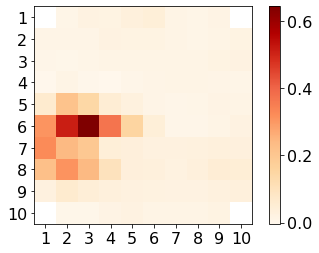

In [5]:
y_mu_mapped_arr = np.squeeze(np.load('output/nhp_mapping_2D_one_animal/y_mu_mapped_arr.npy'))
print(y_mu_mapped_arr.shape)  
# NOTE: y_mu_mapped_arr is in shape (num_hyperparams, num_muscles, *system_shape) or (*system.shape) if squeeze-able
plt.xticks(range(10), range(1, 11))
plt.yticks(range(10), range(1, 11))
plt.imshow(y_mu_mapped_arr, cmap='OrRd')
plt.colorbar()
plt.show()

Let's see what algorithmic performance vs. num. queries looks like. This is essentially the same as the CSV above, but plotted nicely.

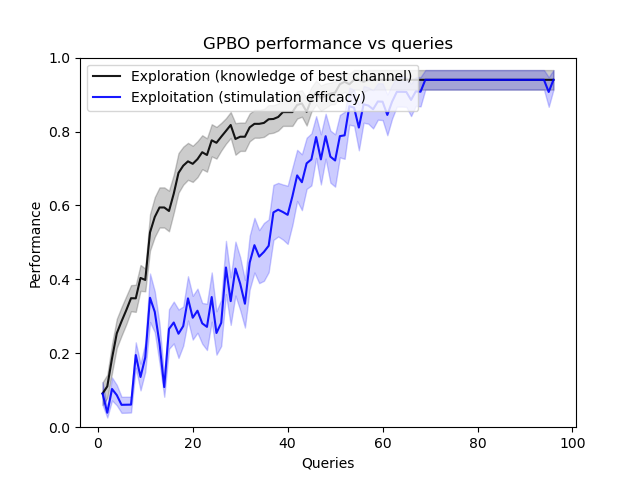

In [6]:
display(Image('output/nhp_mapping_2D_one_animal/performance_vs_queries.png'))

Now, let's run the same pipeline, but using the **extensive** search algorithm instead of the **GPBO** search algorithm as employed before.

In [7]:
!python main.py -c config/nhp_mapping_2D.json \
                -nm 1 \
                -alg extensive \
                -op output/nhp_mapping_2D_one_animal_extensive \
                -hp "{'kappa': 4.0}" \
                -val 

Dataset (sub:muscle):  ['Cebus2_M1_200123:4']
Hooray! Succesfully saved output files to output/nhp_mapping_2D_one_animal_extensive.



Iterating over muscles: 100%|##########| 1/1 [00:00<00:00,  1.39it/s]


We can quickly check the performance through the saved CSV file.

In [8]:
df_extensive = pd.read_csv('output/nhp_mapping_2D_one_animal_extensive/extensive_performance.csv', index_col='queries')
df_extensive = df_extensive[['exploration', 'exploitation']].T
df_extensive

queries,1,2,3,4,5,6,7,8,9,10,...,87,88,89,90,91,92,93,94,95,96
exploration,0.090983,0.116842,0.147549,0.209158,0.283120,0.322675,0.346940,0.366587,0.425818,0.433092,...,0.918974,0.918974,0.918974,0.918974,0.918974,0.918974,0.918974,0.918974,0.918974,0.918974
exploitation,0.090983,0.050606,0.077411,0.098262,0.114789,0.097347,0.095438,0.118156,0.118598,0.042371,...,0.098828,0.143255,0.064803,0.058552,0.108540,0.088487,0.090741,0.049870,0.064740,0.137159


Let's see what algorithmic performance vs. num. queries looks like. This is essentially the same as the CSV above, but plotted nicely.

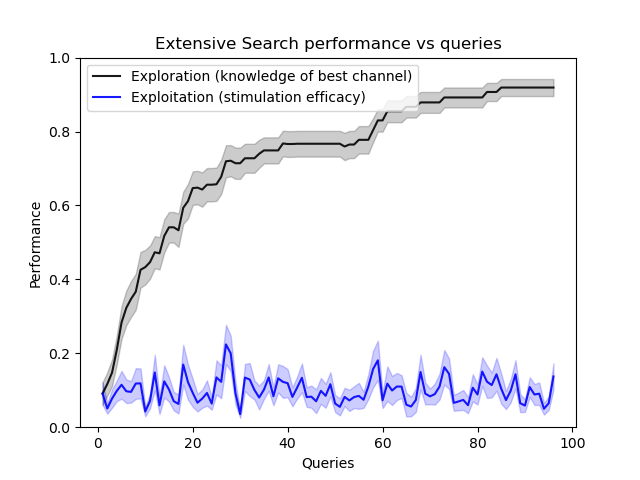

In [9]:
display(Image('output/nhp_mapping_2D_one_animal_extensive/performance_vs_queries.png'))

Now, let's run the same pipeline, but using the **greedy** search algorithm instead of the **GPBO** search algorithm as employed before.

In [10]:
!python main.py -c config/nhp_mapping_2D.json \
                -nm 1 \
                -alg greedy \
                -op output/nhp_mapping_2D_one_animal_greedy \
                -hp "{'kappa': 4.0}" \
                -val

Dataset (sub:muscle):  ['Cebus2_M1_200123:4']
Hooray! Succesfully saved output files to output/nhp_mapping_2D_one_animal_greedy.



Iterating over muscles: 100%|##########| 1/1 [00:00<00:00,  1.03it/s]


In [11]:
df_greedy = pd.read_csv('output/nhp_mapping_2D_one_animal_greedy/greedy_performance.csv', index_col='queries')
df_greedy = df_greedy[['exploration', 'exploitation']].T
df_greedy

queries,1,2,3,4,5,6,7,8,9,10,...,87,88,89,90,91,92,93,94,95,96
exploration,0.090983,0.141451,0.204081,0.244641,0.264967,0.287935,0.292821,0.324065,0.326305,0.346722,...,0.953233,0.953233,0.960044,0.960044,0.960044,0.960044,0.960044,0.953414,0.960044,0.960044
exploitation,0.090983,0.085491,0.143055,0.138162,0.121086,0.118187,0.062845,0.109229,0.136663,0.146571,...,0.281266,0.150205,0.390227,0.230105,0.188139,0.283338,0.196737,0.301878,0.217232,0.201334


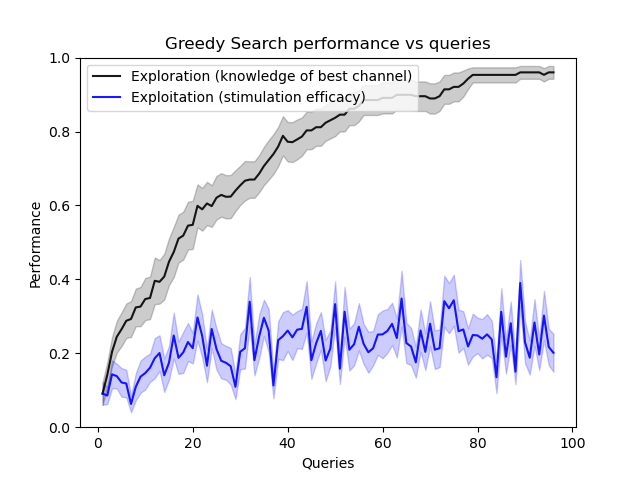

In [12]:
display(Image('output/nhp_mapping_2D_one_animal_greedy/performance_vs_queries.png'))

Finally, we can compare the three algorithms on the same plot for (i) exploration and (ii) exploitation using the command given below.

In [13]:
!python scripts/compare_and_plot.py -r1 output/nhp_mapping_2D_one_animal \
                                    -r2 output/nhp_mapping_2D_one_animal_extensive \
                                    -r3 output/nhp_mapping_2D_one_animal_greedy

Hooray! Successfully compared and plotted the runs!


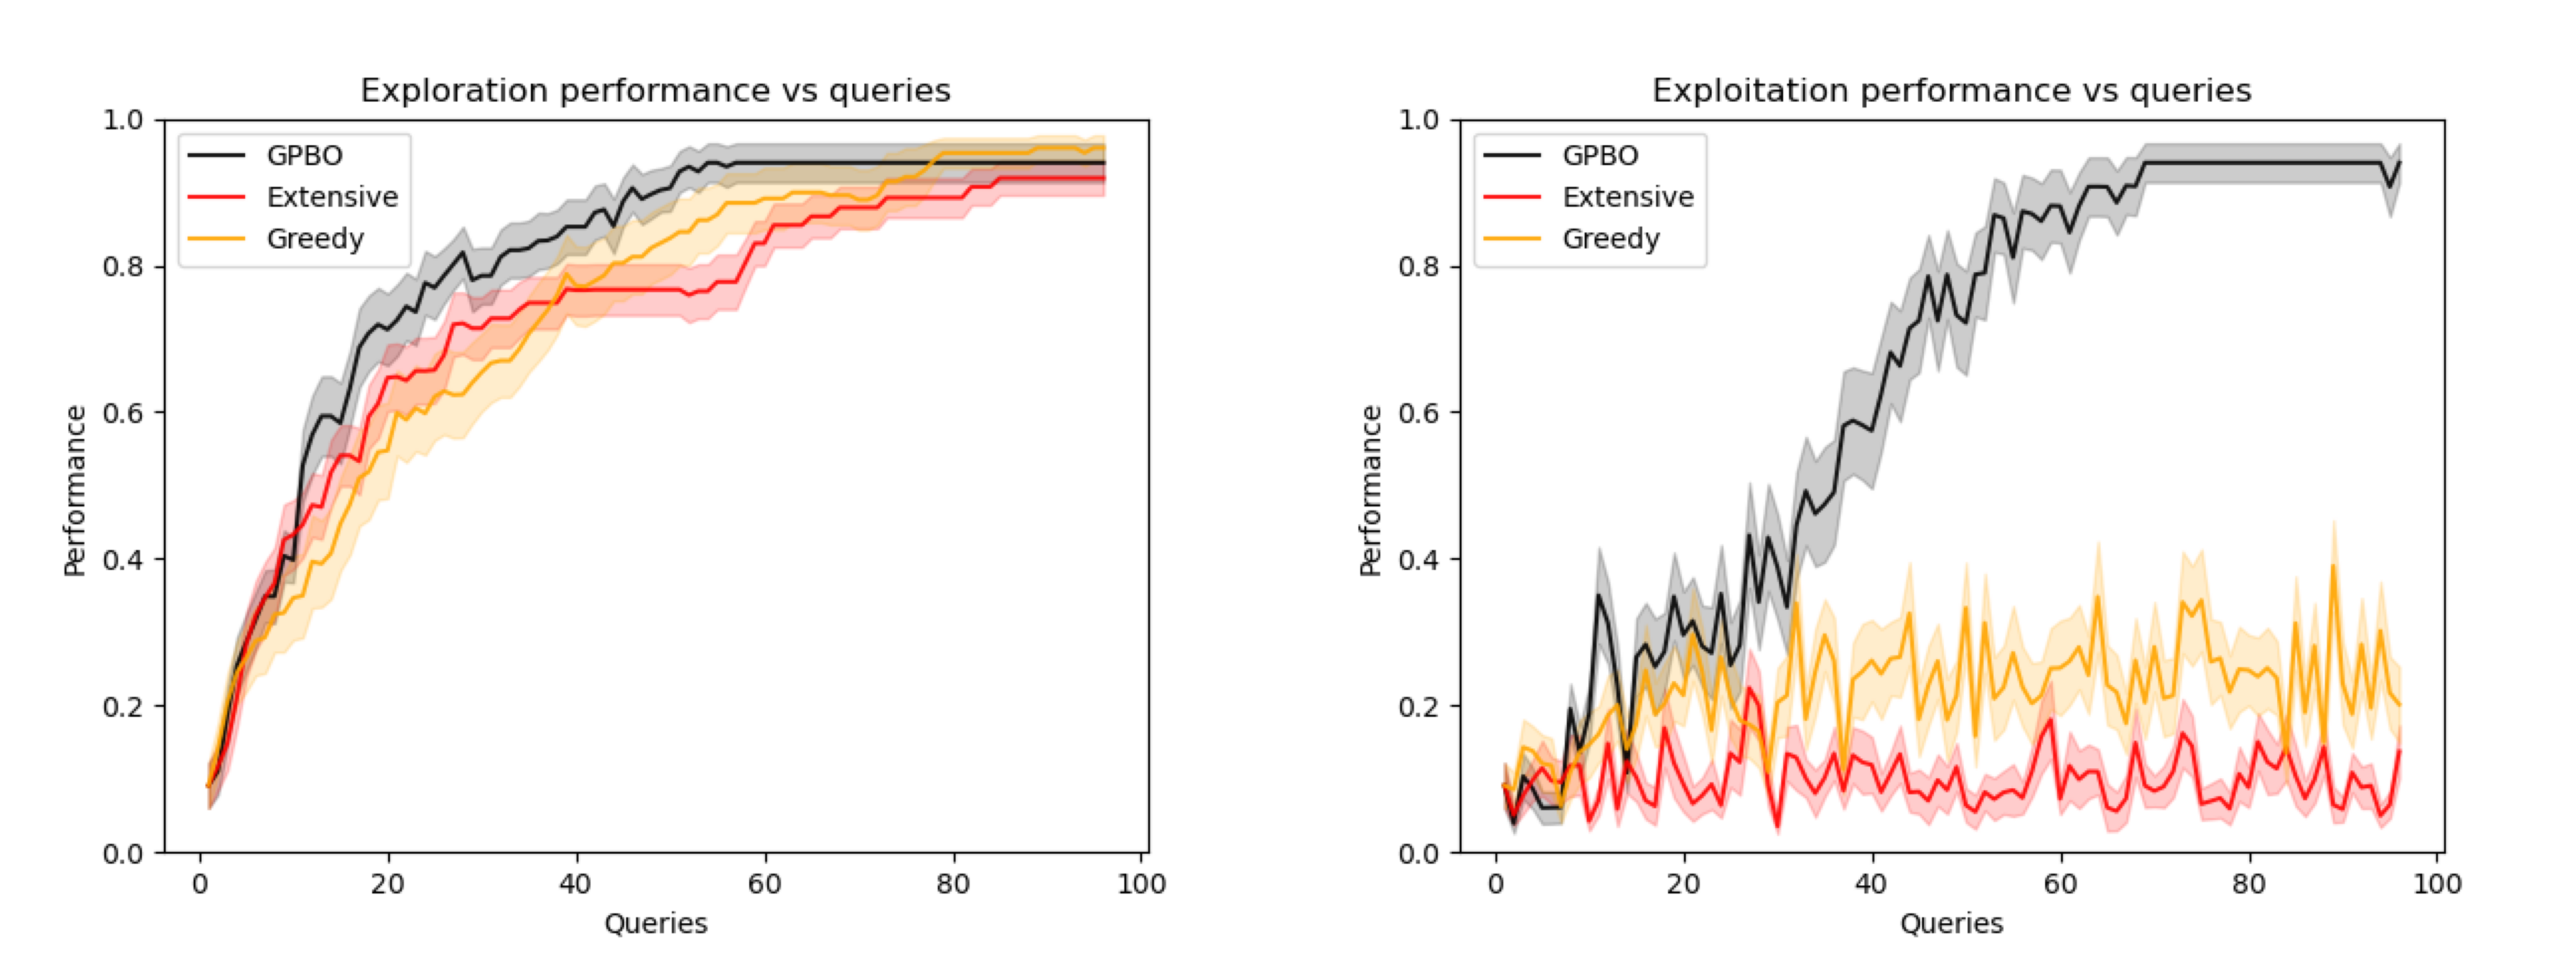

In [14]:
fig, ax = plt.subplots(1, 2, figsize=(50, 30), constrained_layout=True)
ax[0].imshow(PIL_Image.open('output/nhp_mapping_2D_one_animal/exploration_comparison.png'))
ax[0].axis('off')
ax[1].imshow(PIL_Image.open('output/nhp_mapping_2D_one_animal/exploitation_comparison.png'))
ax[1].axis('off')
plt.show()

## Step 6: Run optimization on several validation replicates

We now do the same, but with several validation replicates.

In [72]:
!python main.py -c config/nhp_mapping_2D.json \
                -nm 10 \
                -op output/nhp_mapping_2D_several_animals \
                -hp "{'kappa': 4.0}" \
                -val

Iterating over repetitions:  43%|██████▌        | 13/30 [00:57<01:14,  4.38s/it] /Users/uzaymacar/anaconda3/lib/python3.7/site-packages/GPy/kern/src/stationary.py:166: RuntimeWarning:overflow encountered in true_divide
 /Users/uzaymacar/anaconda3/lib/python3.7/site-packages/GPy/kern/src/stationary.py:137: RuntimeWarning:overflow encountered in square
 /Users/uzaymacar/anaconda3/lib/python3.7/site-packages/GPy/kern/src/stationary.py:138: RuntimeWarning:invalid value encountered in add
Iterating over repetitions:  10%|█▌              | 3/30 [00:16<02:26,  5.44s/it] /Users/uzaymacar/anaconda3/lib/python3.7/site-packages/paramz/transformations.py:119: RuntimeWarning:overflow encountered in expm1
Hooray! Succesfully saved output files to output/nhp_mapping_2D_several_animals.


We can quickly check the performance through the saved CSV file.

In [73]:
df_gpbo = pd.read_csv('output/nhp_mapping_2D_several_animals/gpbo_performance.csv', index_col='queries')
df_gpbo = df_gpbo[['exploration', 'exploitation']].T
df_gpbo

queries,1,2,3,4,5,6,7,8,9,10,...,87,88,89,90,91,92,93,94,95,96
exploration,0.176993,0.279722,0.338881,0.347983,0.354986,0.368233,0.378924,0.407152,0.439899,0.462595,...,0.863477,0.863918,0.863514,0.863394,0.862984,0.864377,0.864967,0.866101,0.866101,0.864967
exploitation,0.176993,0.199952,0.155362,0.101127,0.113131,0.116795,0.135889,0.168302,0.205787,0.206564,...,0.856025,0.854645,0.845104,0.848010,0.854588,0.859651,0.857649,0.862844,0.864438,0.864430


Let's first see what the `y_mu_mapped` looks like. This is the output of GP, `y_mu`, mapped to the dimensions of the problem. 

(10, 10, 10)


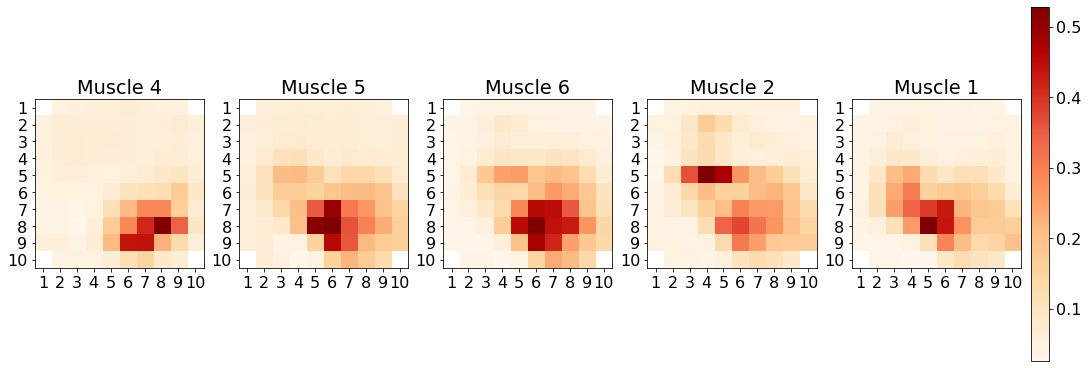

In [74]:
y_mu_mapped_arr = np.squeeze(np.load('output/nhp_mapping_2D_several_animals/y_mu_mapped_arr.npy'))
print(y_mu_mapped_arr.shape)  
# NOTE: y_mu_mapped_arr is in shape (num_hyperparams, num_muscles, *system_shape) or (*system.shape) if squeeze-able
# Show 5 muscles randomly
fig, ax = plt.subplots(1, 5, figsize=(15, 5), constrained_layout=True)
for i, muscle_index in enumerate(np.random.choice(range(y_mu_mapped_arr.shape[0]), ax.shape[0], replace=False)):
    im = ax[i].imshow(y_mu_mapped_arr[muscle_index], cmap='OrRd')
    ax[i].set_title('Muscle %d' % (muscle_index + 1))
    
plt.setp(ax, xticks=range(10), xticklabels=range(1, 11), yticks=range(10), yticklabels=range(1, 11))
fig.colorbar(im, ax=ax[-1])
plt.show()

Let's see what algorithmic performance vs. num. queries looks like. This is essentially the same as the CSV above, but plotted nicely.

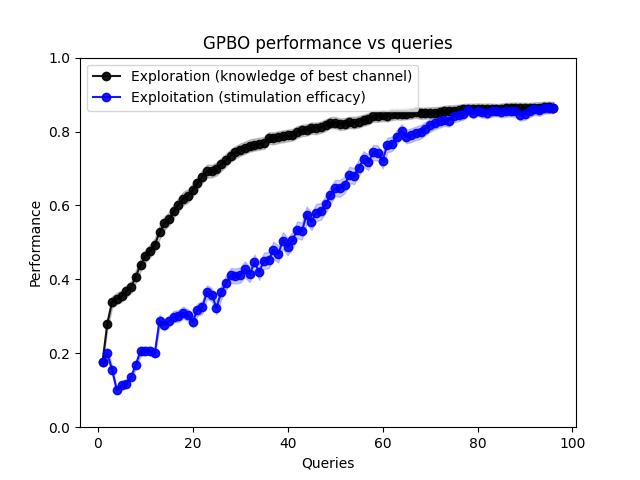

In [75]:
display(Image('output/nhp_mapping_2D_several_animals/performance_vs_queries.png'))

Now, let's run the same pipeline, but using the **extensive** search algorithm instead of the **GPBO** search algorithm as employed before.

In [76]:
!python main.py -c config/nhp_mapping_2D.json \
                -nm 10 \
                -alg extensive \
                -op output/nhp_mapping_2D_several_animals_extensive \
                -hp "{'kappa': 4.0}" \
                -val 

Iterating over repetitions:  17%|██▋             | 5/30 [00:18<01:28,  3.54s/it] /Users/uzaymacar/anaconda3/lib/python3.7/site-packages/GPy/kern/src/stationary.py:137: RuntimeWarning:overflow encountered in square
 /Users/uzaymacar/anaconda3/lib/python3.7/site-packages/GPy/kern/src/stationary.py:138: RuntimeWarning:invalid value encountered in add
Iterating over repetitions:  53%|████████       | 16/30 [00:59<00:50,  3.59s/it] /Users/uzaymacar/anaconda3/lib/python3.7/site-packages/GPy/kern/src/stationary.py:243: RuntimeWarning:invalid value encountered in true_divide
Hooray! Succesfully saved output files to output/nhp_mapping_2D_several_animals_extensive.


We can quickly check the performance through the saved CSV file.

In [77]:
df_extensive = pd.read_csv('output/nhp_mapping_2D_several_animals_extensive/extensive_performance.csv', index_col='queries')
df_extensive = df_extensive[['exploration', 'exploitation']].T
df_extensive

queries,1,2,3,4,5,6,7,8,9,10,...,87,88,89,90,91,92,93,94,95,96
exploration,0.179939,0.252327,0.291666,0.323193,0.344548,0.385395,0.417614,0.436306,0.451411,0.473729,...,0.787630,0.787279,0.790998,0.789278,0.790861,0.794346,0.795550,0.795863,0.794084,0.796431
exploitation,0.179939,0.176828,0.157302,0.164179,0.164290,0.191288,0.183681,0.161269,0.169467,0.177144,...,0.148335,0.177367,0.160997,0.182450,0.159041,0.180078,0.159256,0.179716,0.183569,0.181916


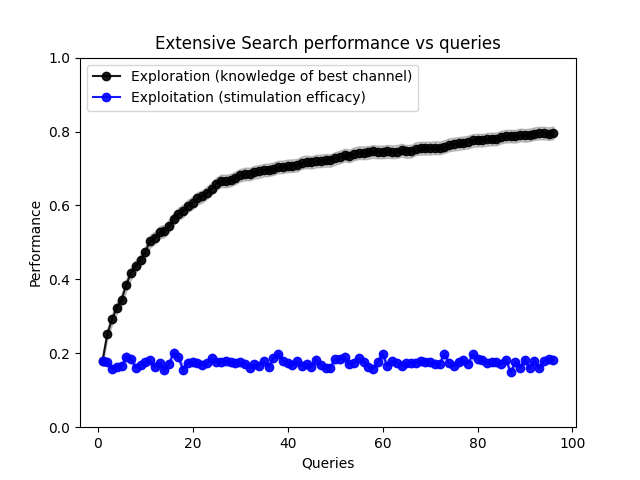

In [84]:
display(Image('output/nhp_mapping_2D_several_animals_extensive/performance_vs_queries.png'))

In [79]:
!python main.py -c config/nhp_mapping_2D.json \
                -nm 10 \
                -alg greedy \
                -op output/nhp_mapping_2D_several_animals_greedy \
                -hp "{'kappa': 4.0}" \
                -val 

Iterating over repetitions:  13%|██▏             | 4/30 [00:19<02:07,  4.89s/it] /Users/uzaymacar/anaconda3/lib/python3.7/site-packages/GPy/kern/src/stationary.py:166: RuntimeWarning:overflow encountered in true_divide
 /Users/uzaymacar/anaconda3/lib/python3.7/site-packages/GPy/kern/src/stationary.py:137: RuntimeWarning:overflow encountered in square
 /Users/uzaymacar/anaconda3/lib/python3.7/site-packages/GPy/kern/src/stationary.py:138: RuntimeWarning:invalid value encountered in add
Iterating over repetitions:  90%|█████████████▌ | 27/30 [02:29<00:16,  5.65s/it] /Users/uzaymacar/anaconda3/lib/python3.7/site-packages/GPy/kern/src/stationary.py:243: RuntimeWarning:invalid value encountered in true_divide
Hooray! Succesfully saved output files to output/nhp_mapping_2D_several_animals_greedy.


In [80]:
df_greedy = pd.read_csv('output/nhp_mapping_2D_several_animals_greedy/greedy_performance.csv', index_col='queries')
df_greedy = df_greedy[['exploration', 'exploitation']].T
df_greedy

queries,1,2,3,4,5,6,7,8,9,10,...,87,88,89,90,91,92,93,94,95,96
exploration,0.167948,0.227622,0.268183,0.287528,0.313318,0.330493,0.342359,0.350435,0.356883,0.368167,...,0.734118,0.734595,0.735279,0.733648,0.740991,0.743222,0.746475,0.748403,0.74961,0.749727
exploitation,0.167948,0.182045,0.197111,0.170506,0.183133,0.177361,0.170228,0.164909,0.174788,0.193413,...,0.177442,0.170285,0.156655,0.179692,0.177662,0.164713,0.186952,0.172811,0.17000,0.173938


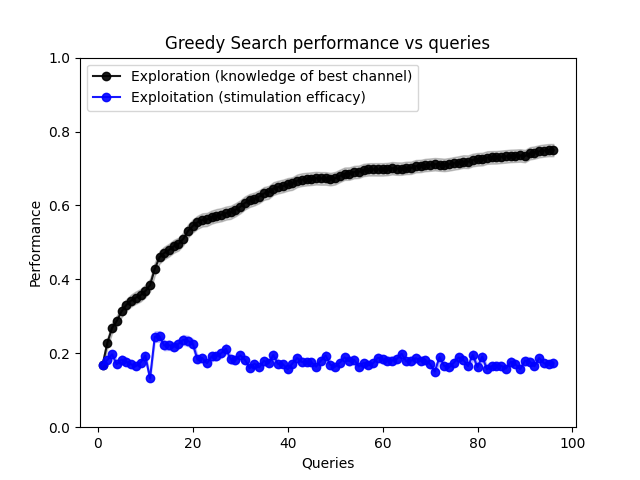

In [81]:
display(Image('output/nhp_mapping_2D_several_animals_greedy/performance_vs_queries.png'))

Finally, we can compare the three algorithms on the same plot for (i) exploration and (ii) exploitation using the command given below.

In [82]:
!python scripts/compare_and_plot.py -r1 output/nhp_mapping_2D_several_animals \
                                    -r2 output/nhp_mapping_2D_several_animals_extensive \
                                    -r3 output/nhp_mapping_2D_several_animals_greedy

Hooray! Successfully compared and plotted the two runs!


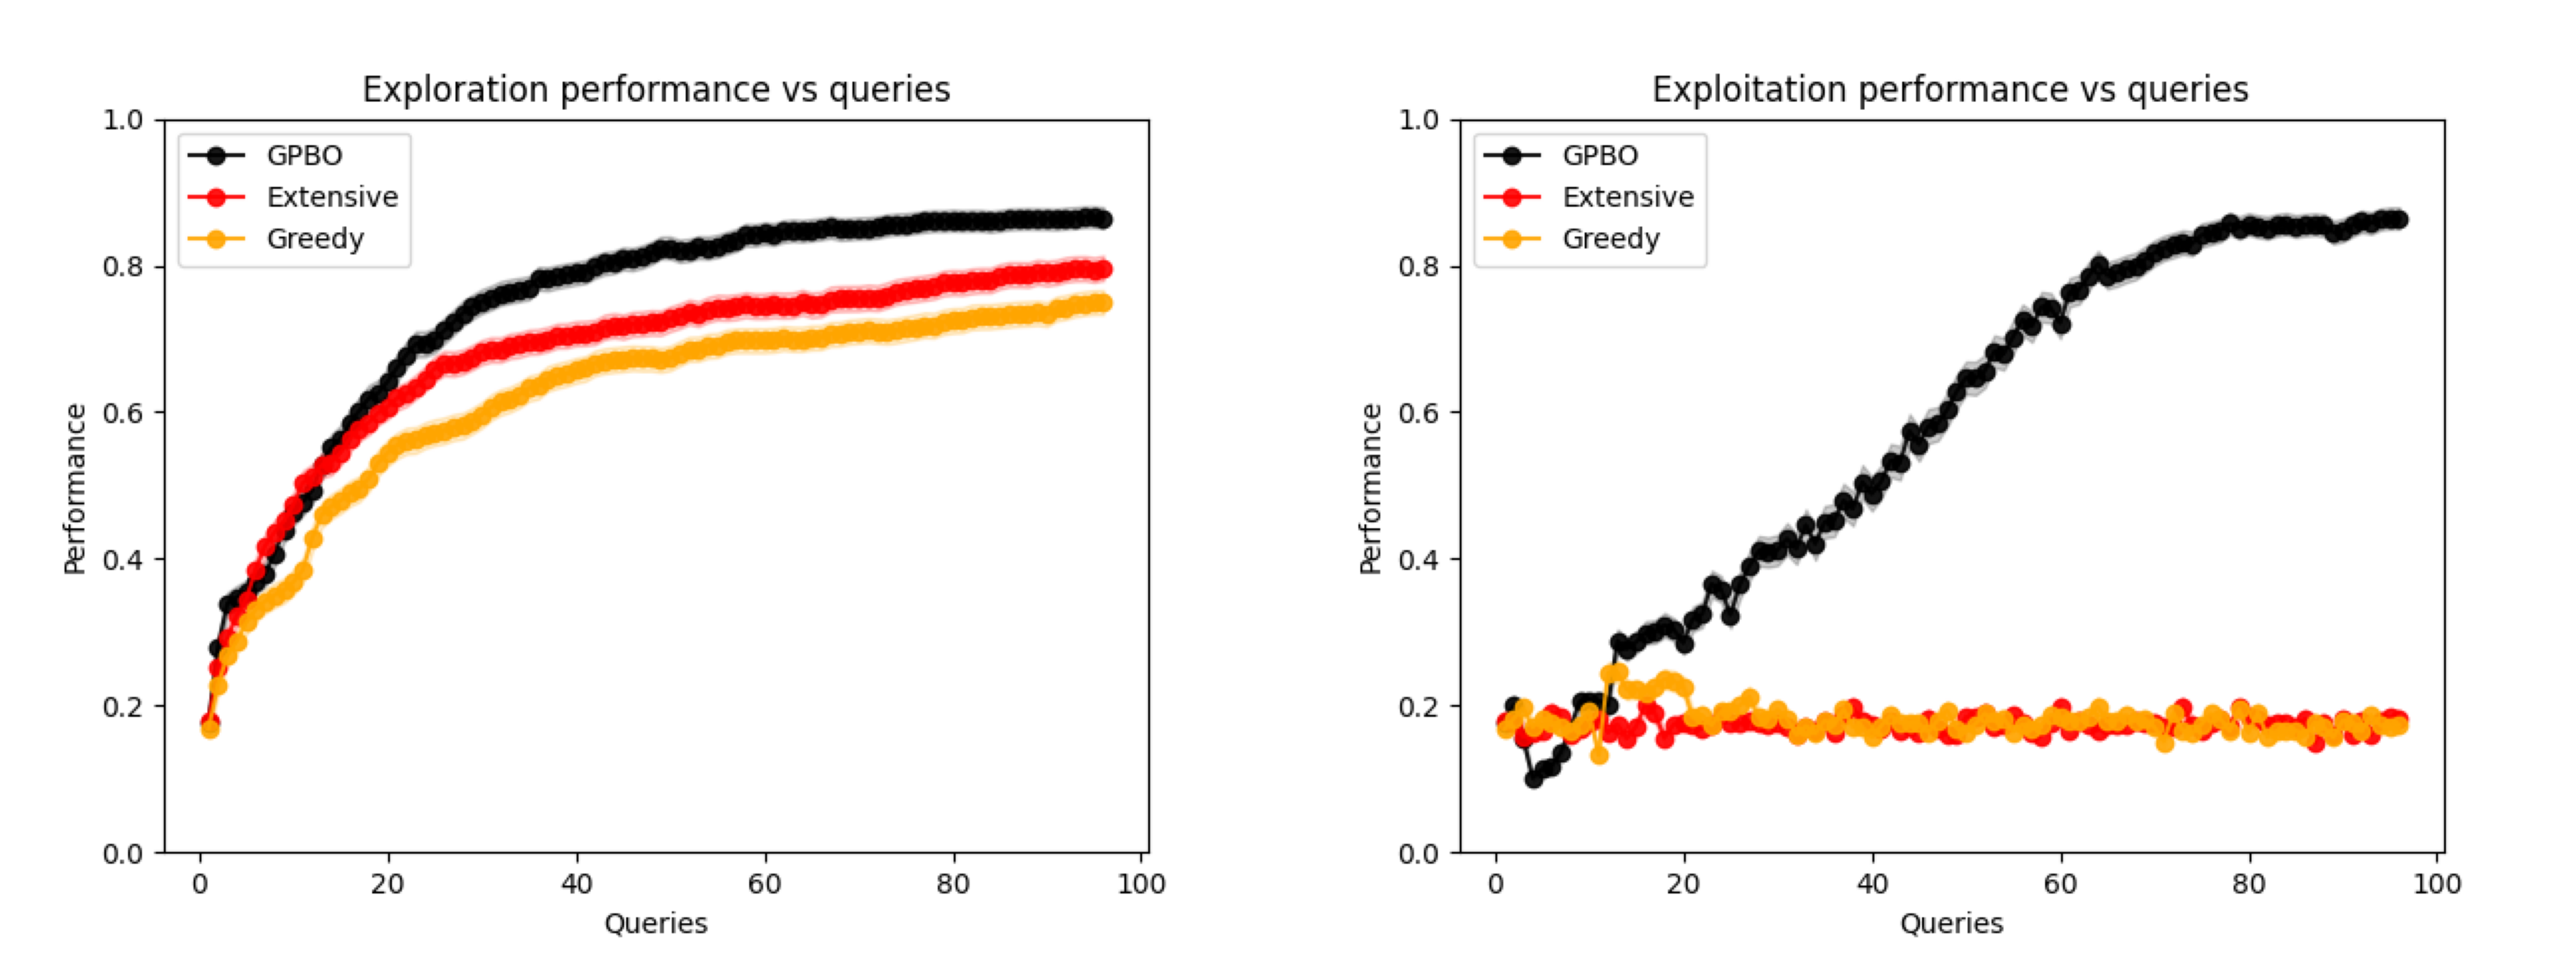

In [83]:
fig, ax = plt.subplots(1, 2, figsize=(50, 30), constrained_layout=True)
ax[0].imshow(PIL_Image.open('output/nhp_mapping_2D_several_animals/exploration_comparison.png'))
ax[0].axis('off')
ax[1].imshow(PIL_Image.open('output/nhp_mapping_2D_several_animals/exploitation_comparison.png'))
ax[1].axis('off')
plt.show()

## Running validation on all replicates

In [13]:
!python main.py -c config/nhp_mapping_2D.json \
                -op output/nhp_mapping_2D_all \
                -hp "{'kappa': 4.0}" \
                -val 

Dataset (sub:muscle):  ['Cebus2_M1_200123:4', 'Macaque2_M1_190527:2', 'Macaque2_M1_190527:0', 'Cebus2_M1_200123:0', 'Cebus1_M1_190221:0', 'Macaque2_M1_190527:1', 'Cebus2_M1_200123:5', 'Cebus1_M1_190221:2', 'Cebus1_M1_190221:3', 'Cebus2_M1_200123:3', 'Cebus1_M1_190221:5', 'Cebus2_M1_200123:1', 'Cebus1_M1_190221:4', 'Macaque1_M1_181212:3', 'Macaque1_M1_181212:0', 'Macaque2_M1_190527:3', 'Macaque1_M1_181212:1', 'Macaque1_M1_181212:2', 'Cebus2_M1_200123:2', 'Cebus1_M1_190221:1', 'Cebus2_M1_200123:7', 'Cebus2_M1_200123:6']
Iterating over repetitions:  23%|███▋            | 7/30 [01:01<03:06,  8.10s/it] /Users/uzaymacar/anaconda3/lib/python3.7/site-packages/GPy/kern/src/stationary.py:137: RuntimeWarning:overflow encountered in square
 /Users/uzaymacar/anaconda3/lib/python3.7/site-packages/GPy/kern/src/stationary.py:138: RuntimeWarning:invalid value encountered in add
Iterating over repetitions:  60%|█████████      | 18/30 [01:35<00:56,  4.70s/it] main.py:250: RuntimeWarning:invalid value enc

In [24]:
!python main.py -c config/nhp_mapping_2D.json \
                -alg extensive \
                -op output/nhp_mapping_2D_all_extensive \
                -hp "{'kappa': 4.0}" \
                -val 

Dataset (sub:muscle):  ['Cebus2_M1_200123:4', 'Macaque2_M1_190527:2', 'Macaque2_M1_190527:0', 'Cebus2_M1_200123:0', 'Cebus1_M1_190221:0', 'Macaque2_M1_190527:1', 'Cebus2_M1_200123:5', 'Cebus1_M1_190221:2', 'Cebus1_M1_190221:3', 'Cebus2_M1_200123:3', 'Cebus1_M1_190221:5', 'Cebus2_M1_200123:1', 'Cebus1_M1_190221:4', 'Macaque1_M1_181212:3', 'Macaque1_M1_181212:0', 'Macaque2_M1_190527:3', 'Macaque1_M1_181212:1', 'Macaque1_M1_181212:2', 'Cebus2_M1_200123:2', 'Cebus1_M1_190221:1', 'Cebus2_M1_200123:7', 'Cebus2_M1_200123:6']
Iterating over repetitions:   0%|                        | 0/30 [00:00<?, ?it/s] main.py:469: RuntimeWarning:Mean of empty slice
 main.py:465: RuntimeWarning:invalid value encountered in multiply
Hooray! Succesfully saved output files to output/nhp_mapping_2D_all_extensive.  


In [25]:
!python main.py -c config/nhp_mapping_2D.json \
                -alg greedy \
                -op output/nhp_mapping_2D_all_greedy \
                -hp "{'kappa': 4.0}" \
                -val 

Dataset (sub:muscle):  ['Cebus2_M1_200123:4', 'Macaque2_M1_190527:2', 'Macaque2_M1_190527:0', 'Cebus2_M1_200123:0', 'Cebus1_M1_190221:0', 'Macaque2_M1_190527:1', 'Cebus2_M1_200123:5', 'Cebus1_M1_190221:2', 'Cebus1_M1_190221:3', 'Cebus2_M1_200123:3', 'Cebus1_M1_190221:5', 'Cebus2_M1_200123:1', 'Cebus1_M1_190221:4', 'Macaque1_M1_181212:3', 'Macaque1_M1_181212:0', 'Macaque2_M1_190527:3', 'Macaque1_M1_181212:1', 'Macaque1_M1_181212:2', 'Cebus2_M1_200123:2', 'Cebus1_M1_190221:1', 'Cebus2_M1_200123:7', 'Cebus2_M1_200123:6']
Iterating over repetitions:   0%|                        | 0/30 [00:00<?, ?it/s] main.py:469: RuntimeWarning:Mean of empty slice
 main.py:465: RuntimeWarning:invalid value encountered in multiply
Hooray! Succesfully saved output files to output/nhp_mapping_2D_all_greedy.     


In [26]:
!python scripts/compare_and_plot.py -r1 output/nhp_mapping_2D_all \
                                    -r2 output/nhp_mapping_2D_all_extensive \
                                    -r3 output/nhp_mapping_2D_all_greedy

Hooray! Successfully compared and plotted the runs!


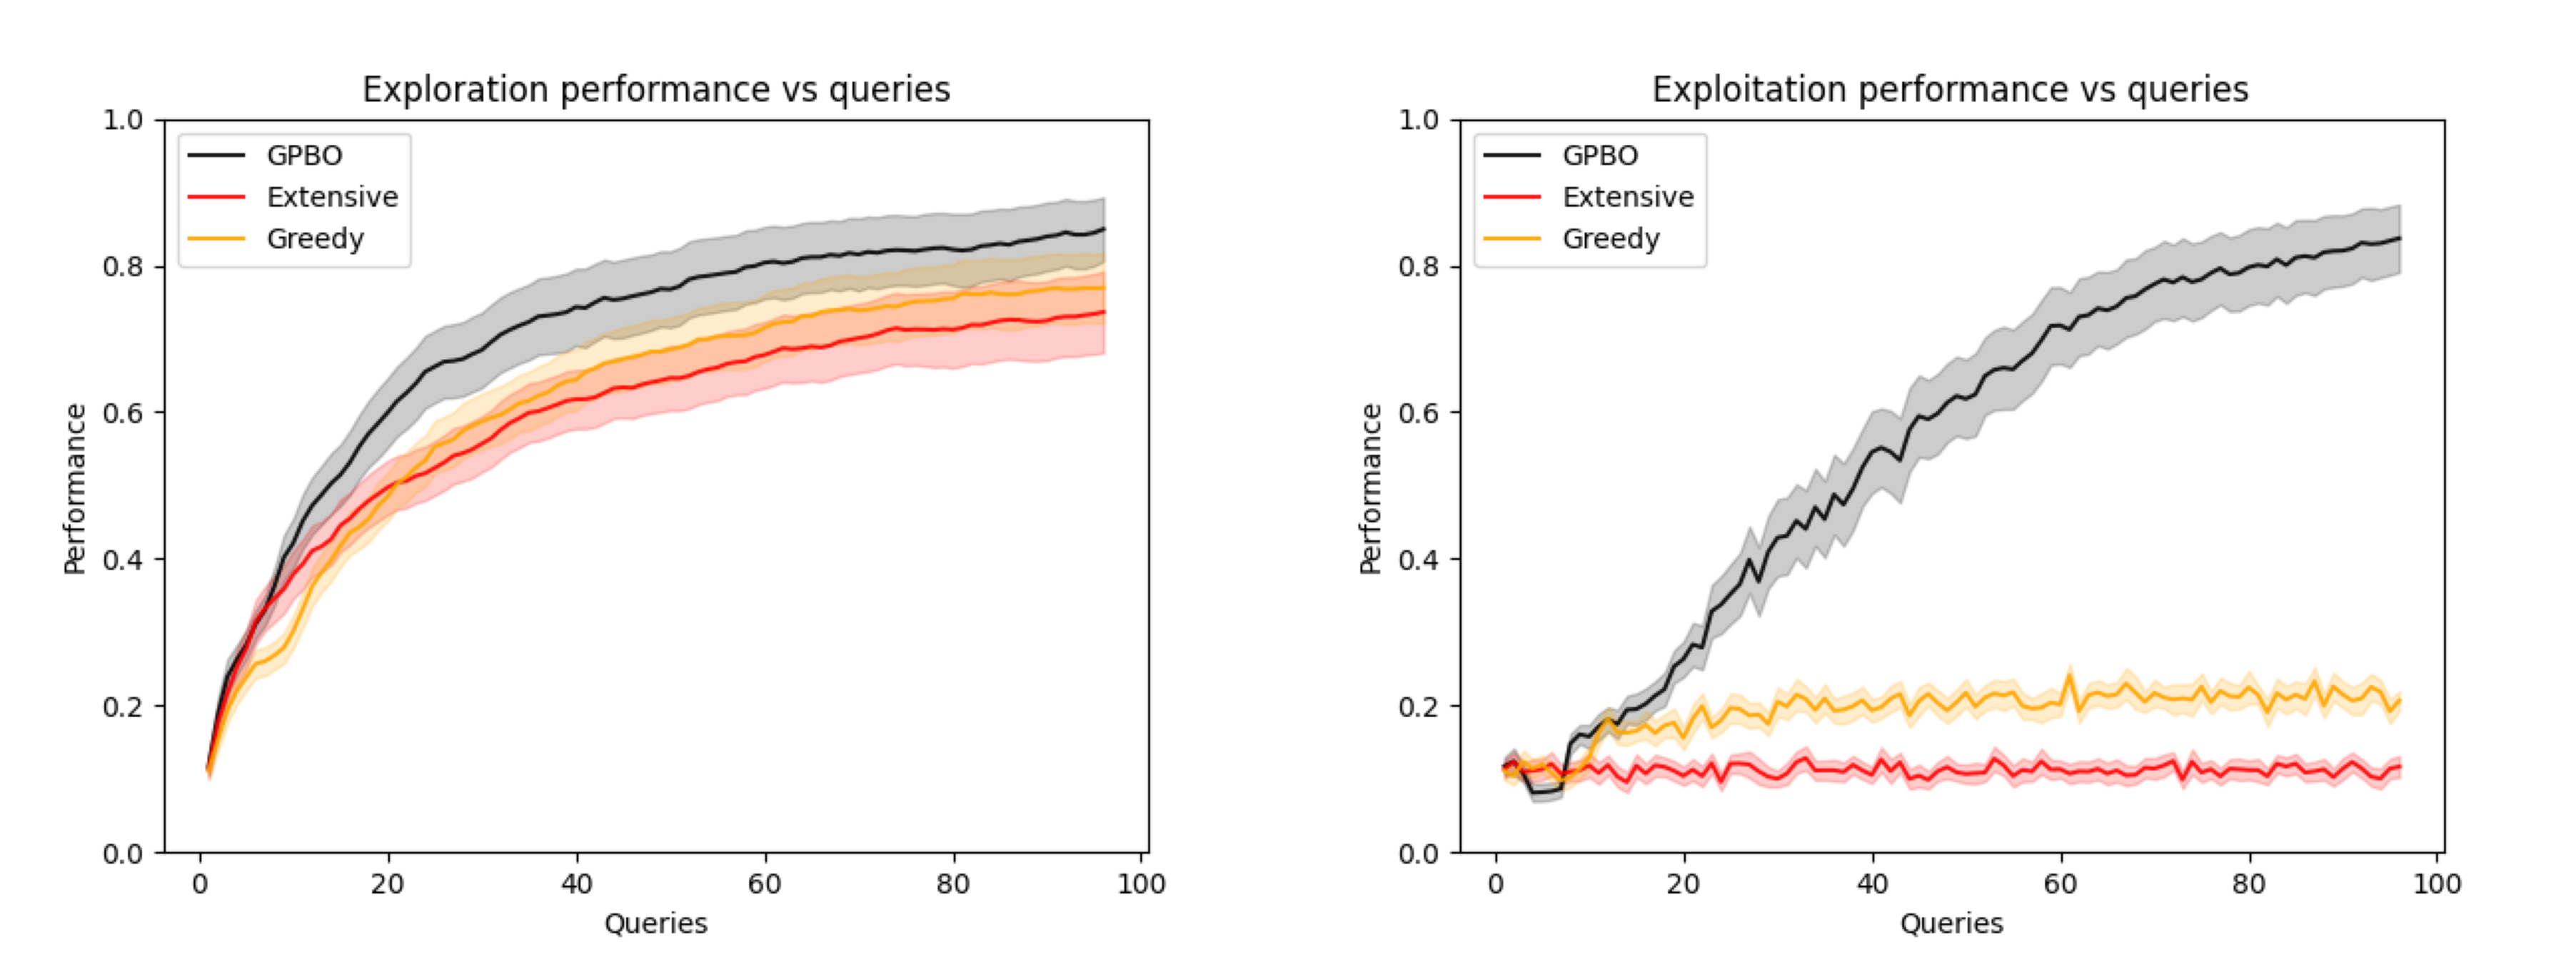

In [27]:
fig, ax = plt.subplots(1, 2, figsize=(50, 30), constrained_layout=True)
ax[0].imshow(PIL_Image.open('output/nhp_mapping_2D_all/exploration_comparison.png'))
ax[0].axis('off')
ax[1].imshow(PIL_Image.open('output/nhp_mapping_2D_all/exploitation_comparison.png'))
ax[1].axis('off')
plt.show()

## Step 7: Run offline hyperpamater optimization

Now that we saw how `optim-neurostim` can be utilized to run validation experiments, let's see how we decided on the best value for `kappa`. Now, we will run the command without any additional flags to perform offline hyperparameter optimization. As discussed before, the config file encodes all of the necessary information.

In [85]:
!python main.py -c config/nhp_mapping_2D.json \
                -op output/nhp_mapping_2D 

Iterating over repetitions:  80%|████████████   | 24/30 [01:59<00:29,  4.94s/it] /Users/uzaymacar/anaconda3/lib/python3.7/site-packages/GPy/kern/src/stationary.py:166: RuntimeWarning:overflow encountered in true_divide
 /Users/uzaymacar/anaconda3/lib/python3.7/site-packages/GPy/kern/src/stationary.py:137: RuntimeWarning:overflow encountered in square
 /Users/uzaymacar/anaconda3/lib/python3.7/site-packages/GPy/kern/src/stationary.py:138: RuntimeWarning:invalid value encountered in add
Iterating over repetitions:  23%|███▋            | 7/30 [00:31<01:38,  4.29s/it] /Users/uzaymacar/anaconda3/lib/python3.7/site-packages/GPy/kern/src/stationary.py:568: RuntimeWarning:overflow encountered in multiply
 /Users/uzaymacar/anaconda3/lib/python3.7/site-packages/GPy/kern/src/stationary.py:568: RuntimeWarning:invalid value encountered in multiply
Hooray! Succesfully saved output files to output/nhp_mapping_2D.                


Let's first see what the algorithmic performance looks like for different values of hyperparameter `kappa`.

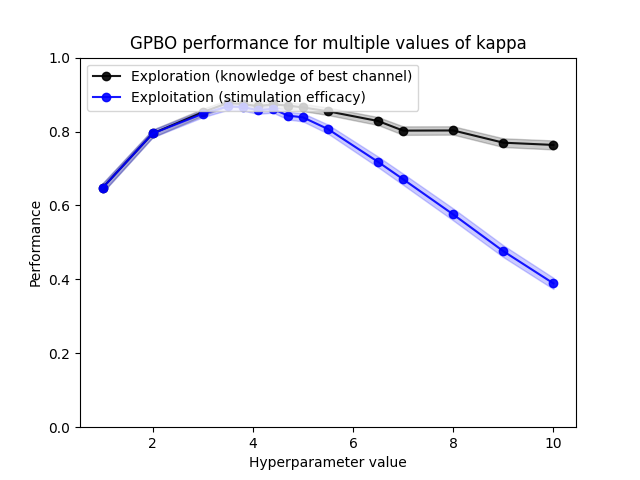

In [86]:
display(Image('output/nhp_mapping_2D/performance_for_kappa.png'))

This command also gives us a `.pkl` containing the best values for hyperparameters which we can pass onto validation experiments later. Let's investigate this below.

In [87]:
with open('output/nhp_mapping_2D/best_hyperparams.pkl', 'rb') as f:
    d = pickle.load(f)

print(d)

{'kappa': 3.5}
